# **Space X  Falcon 9 First Stage Landing Prediction**


## Machine Learning Prediction

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


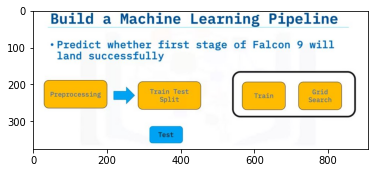

<Figure size 864x864 with 0 Axes>

In [9]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('Coursera ML.JPG')
imgplot = plt.imshow(img)

plt.figure(figsize=(12, 12))
plt.show()

We are going to make a machine learning. The steps are :
- Pre-processing the dataset. Make the dataset ready for analysis and machine learning
- After the dataset is ready, we split the dataset to Train Set and Test Set
- We will train the model we have and make them perform Grid Search which will allowing us to find the hyperparameters that given algorithm to perform best
- Using the best hyperparameter values, we will determine the model with the best accuracy using the training data

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


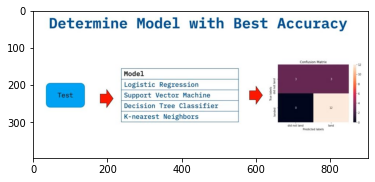

<Figure size 864x864 with 0 Axes>

In [11]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('Coursera Model With Best Accuracy.JPG')
imgplot = plt.imshow(img)

plt.figure(figsize=(12, 12))
plt.show()

What model we are going to make ?
- Logistic Regression
- Support Vector Machines
- Decision Tree Classifier
- K-Nearest Neighbors

After all of that, we will make output the confusion matrix. Then we know which model has the best performance basec on the confusion matrix.

## Objectives

Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data

## Import Libraries and Define Auxiliary Functions


We will import the following libraries for the lab

In [12]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
# Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [55]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [42]:
# Setting the random seed
np.random.seed(0)

This function is to plot the confusion matrix.

In [13]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

## Load Dataframe

Load the data

In [14]:
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [26]:
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_3.csv')
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [27]:
#Check data type
X.dtypes

FlightNumber     float64
PayloadMass      float64
Flights          float64
Block            float64
ReusedCount      float64
                  ...   
GridFins_True    float64
Reused_False     float64
Reused_True      float64
Legs_False       float64
Legs_True        float64
Length: 83, dtype: object

X datatype are all numeric

## 1 

Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).

In [24]:
Y = data['Class'].to_numpy()

# Show first 10 values in Y
Y[0:10]

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

## 2

Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below

In [44]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.71291154e+00, -5.29526321e-17, -6.53912840e-01,
        -1.57589457e+00, -9.73440458e-01, -1.05999788e-01,
        -1.05999788e-01, -6.54653671e-01, -1.05999788e-01,
        -5.51677284e-01,  3.44342023e+00, -1.85695338e-01,
        -3.33333333e-01, -1.05999788e-01, -2.42535625e-01,
        -4.29197538e-01,  7.97724035e-01, -5.68796459e-01,
        -4.10890702e-01, -4.10890702e-01, -1.50755672e-01,
        -7.97724035e-01, -1.50755672e-01, -3.92232270e-01,
         9.43398113e+00, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.50755672e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.50755672e-01, -1.05999788e-0

##  3

- Use the function train_test_split to split the data X and Y into training and test data. 
- Set the parameter test_size to  0.2 and random_state to 2. 
- The training data and test data should be assigned to the following labels.

In [52]:
# Split the data to Train Set and Test Set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Shape of Train set and Test set
print('Train set:', X_train.shape, Y_train.shape)
print('Test set:', X_test.shape, Y_test.shape)

Train set: (72, 83) (72,)
Test set: (18, 83) (18,)


In [54]:
Y_test.shape

(18,)

We split the data : 80% for training and 20% for test. </br>
The train set has 72 observations </br>
The test set has 18 observations

##  4

- Create a logistic regression object  
- then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  
- Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [111]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

- We output the <code>GridSearchCV</code> object for logistic regression. 
- We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.

In [112]:
# Grid search cross validation
parameters={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv=GridSearchCV(lr,parameters,cv=10)
logreg_cv.fit(X_train,Y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


##  5

Calculate the accuracy on the test data using the method <code>score</code>:

In [115]:
from sklearn import metrics
print('Test set Accuracy:', metrics.accuracy_score(Y_test, yhat))

Test set Accuracy: 0.8333333333333334


Lets look at the confusion matrix:

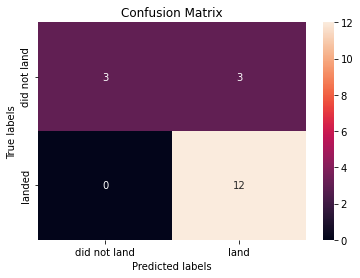

In [113]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

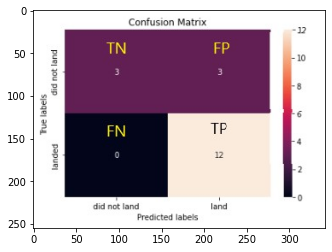

<Figure size 864x864 with 0 Axes>

In [117]:
img = mpimg.imread('Confusion Matrix Log Reg.jpg')
imgplot = plt.imshow(img)

plt.figure(figsize=(12, 12))
plt.show()

*Notes* 
- TP : True Positive 
- FP : False Positive
- TN : True Negative
- FN : False Negative

From Confusion Matrix above, we can see that Logistic Regression can\
distinguish the different 4 classes. But the model got 3 False Positive (FP)\
This is a problem, because when we predicted it going to land \
but in the reality it didn't

##  6

- Create a support vector machine object then  
- create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  
- Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [119]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [121]:
# Grid search cross validation
svm_cv=GridSearchCV(svm,parameters,cv=10)
svm_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [122]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


##   7

Calculate the accuracy on the test data using the method <code>score</code>:

In [128]:
print('Test set Accuracy:', metrics.accuracy_score(Y_test, yhat_svm))

Test set Accuracy: 0.8333333333333334


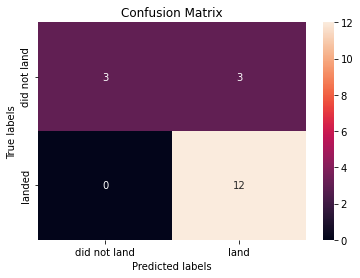

In [127]:
yhat_svm=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_svm)

##   8

- Create a decision tree classifier object then  
- create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  
- Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [129]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [130]:
# Grid search cross validation
tree_cv=GridSearchCV(tree,parameters,cv=10)
tree_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [131]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.8767857142857143


##   9

Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [133]:
yhat_tree = tree_cv.predict(X_test)

In [134]:
print('Test set Accuracy:', metrics.accuracy_score(Y_test, yhat_tree))

Test set Accuracy: 0.8333333333333334


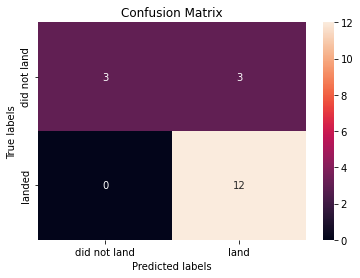

In [135]:
plot_confusion_matrix(Y_test,yhat)

##   10

- Create a k nearest neighbors object then  
- create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  
- Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [136]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [137]:
# Grid search cross validation
knn_cv=GridSearchCV(KNN,parameters,cv=10)
knn_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [138]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


##   11

Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:

In [139]:
yhat_knn = knn_cv.predict(X_test)

In [140]:
print('Test set Accuracy:', metrics.accuracy_score(Y_test, yhat_knn))

Test set Accuracy: 0.8333333333333334


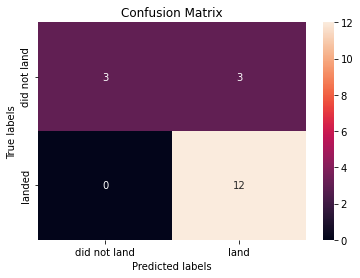

In [141]:
plot_confusion_matrix(Y_test,yhat)

##  12

Find the method performs best:

All of the model has the same accuracy in Test Set \ 
But if we look in Training Set, The Best Model is Decision Tree \
</br>
In my opinion, The Test Set is too small. We can analyze enough to differentiate the performance of the models.